In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import seaborn as sns
import scipy

# Soft Clustering mit Gaussian Mixture Models

In [2]:
# erste Punktwolke
x_werte = np.random.normal(0,0.2,100)
y_werte = np.random.normal(3,0.2,100)

# zweite Punktwolke
x_werte_2 = np.random.normal(6,1,1000)
y_werte_2 = np.random.normal(6,1,1000)

# dritte Punktwolke
x_werte_3 = np.random.normal(0,0.2,1000)
y_werte_3 = np.random.normal(5,0.2,1000)

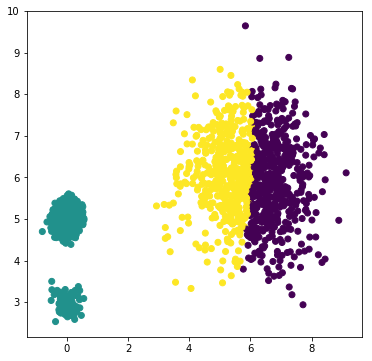

In [3]:
data_x = np.concatenate([x_werte, x_werte_2, x_werte_3])
data_y = np.concatenate([y_werte, y_werte_2, y_werte_3])

dataset = pd.DataFrame()

dataset['x'] = data_x
dataset['y'] = data_y

dataset.head()

x = np.array([1,1,1])

mixture = GaussianMixture(n_components=3, covariance_type='full').fit(dataset)

dataset['mixture_nr'] = mixture.predict(dataset)

# plotte ich diesen Datensatz mit 'scatter'
plt.figure(1, figsize=(6, 6))
plt.scatter(data_x, data_y, c=dataset['mixture_nr'])
plt.show();

# K-Means im Vergleich zu Gaussian Mixture Models

In [4]:
# erste Punktwolke
x_werte = np.random.normal(1,0.5,100)
y_werte = np.random.normal(3,0.5,100)

# zweite Punktwolke
x_werte_2 = np.random.normal(6,1,1000)
y_werte_2 = np.random.normal(6,1,1000)

# dritte Punktwolke
x_werte_3 = np.random.normal(1,0.5,1000)
y_werte_3 = np.random.normal(5,0.5,1000)

In [29]:
data_x = np.concatenate([x_werte, x_werte_2, x_werte_3])
data_y = np.concatenate([y_werte, y_werte_2, y_werte_3])

dataset = pd.DataFrame()
dataset['x'] = data_x
dataset['y'] = data_y

dataset2 = pd.DataFrame()
dataset2["x"] = data_x
dataset2["y"] = data_y

# KMeans
kmeans = KMeans(n_clusters=3, random_state=0, n_init=100).fit(dataset)


# Gaussian Mixture Models
mixture = GaussianMixture(n_components=3, covariance_type='full', n_init=100).fit(dataset2)

# Angabe der Wahrscheinlichkeit, dass ein Datenpunkt zu einem Cluster gehört
mixture_probs = mixture.predict_proba(dataset2)
mixture_probs = pd.DataFrame(mixture_probs)
dataset2_v1 = pd.concat((dataset,mixture_probs),axis = 1)
dataset2_v1['mixture'] = mixture.predict(dataset2)
dataset2_v1

,x,y,0,1,2,mixture
0,0.973188,2.859327,3.546218e-04,6.490378e-08,0.999645,2
1,0.303899,2.574884,3.106390e-05,3.436944e-09,0.999969,2
2,1.067402,3.770820,2.547093e-01,1.165168e-06,0.745290,2
3,1.386256,2.926027,7.150678e-04,7.333318e-07,0.999284,2
4,1.532750,3.324029,2.013208e-02,6.329043e-06,0.979862,2
5,0.663443,2.502581,1.330022e-05,7.487136e-09,0.999987,2
6,0.541115,2.638244,5.044822e-05,7.161147e-09,0.999950,2
7,0.750528,3.676107,1.448116e-01,2.244732e-07,0.855188,2
8,2.030436,2.502736,1.959457e-05,2.380352e-05,0.999957,2
9,0.686800,3.632160,1.122868e-01,1.585980e-07,0.887713,2


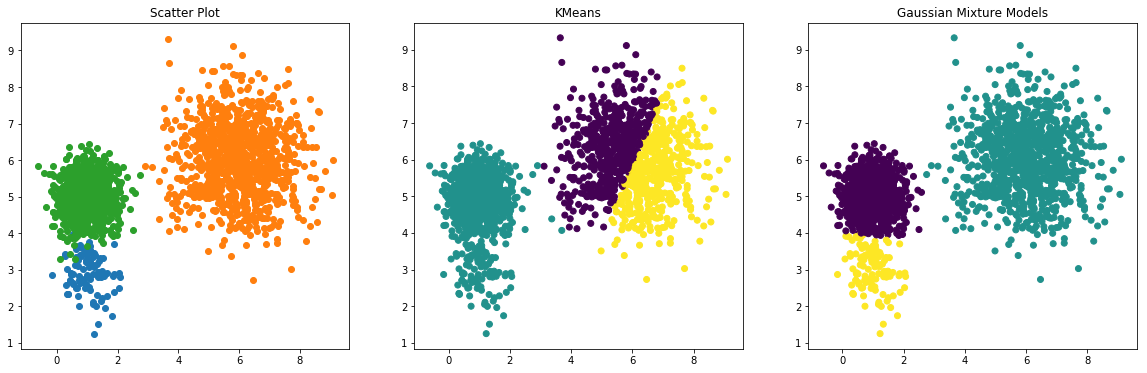

In [6]:
#KMeans Dataset
dataset['cluster_nr'] = kmeans.predict(dataset)

#Gaussian Mixture Model Dataset2
dataset2['mixture'] = mixture.predict(dataset2)

# Nur Daten
plt.figure(1, figsize=(20, 6))
plt.subplot(1,3,1)
plt.scatter(x_werte, y_werte)
plt.scatter(x_werte_2, y_werte_2)
plt.scatter(x_werte_3, y_werte_3)
plt.title("Scatter Plot")

# Plot K-Means
plt.subplot(1,3,2)
plt.scatter(data_x, data_y, c=dataset['cluster_nr'])
plt.title("KMeans")

#Plot Gaussian Mixture Models
plt.subplot(1,3,3)
plt.scatter(data_x, data_y, c=dataset2['mixture'])
plt.title("Gaussian Mixture Models")

plt.show()

# Graphische Darstellung der Wahrscheinlichkeit, dass ein Punkt zu einem Cluster gehört
# Je unwahrscheinlicher die Zugehörigkeit des Punkts zu einem Cluster ist, desto kleiner ist der Punkt

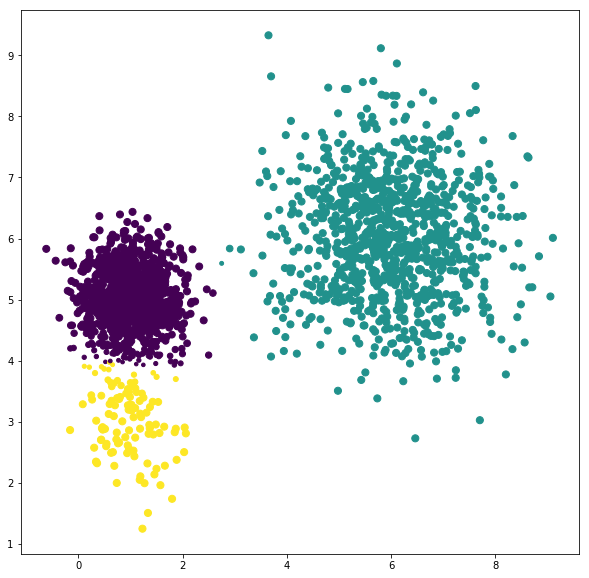

In [24]:
size = 50 * mixture_probs.max(1)**2 
# er geht die Liste mixture_probs durch, in der die Wahrscheinlichkeit der Punkte für ein Cluster angegeben ist und
# sucht sich die maximale Wahrscheinlichkeit raus (1)
# die maximale Wahrscheinlichkeit (max) wird mit 2 potenziert (**2) und mit 50 multipliziert
# die Multiplikation mit 50 lässt die Wahrscheinlichkeit größer oder kleiner als Kreis darstellen
plt.figure(1, figsize=(10, 10))
plt.scatter(data_x, data_y, s = size, c=dataset2_v1["mixture"])
# s = blob size, c = Färb die Punkte nach der Zugehörigkeit in der Spalte "mixture" ein